In [5]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data2023 = pd.read_csv("data/EmpComp2023.csv")
data2023

,_id,Name,Department,Job Title (as of 12/31/23),Total Cash Compensation,Base Pay,Overtime,Sick and Vacation Payouts,Other Cash Compensation,Defined Contribution Plan Contributions - City Paid,Medical Dental Vision,Retirement Contributions (Normal Cost) - City Paid,"Long Term Disability, Life, Medicare",Misc Employment Related Costs
0,1,Maximillian Duenas,Fire,Fire Captain,"620,986.55","180,574.29","436,373.06",NaN,"4,039.20",NaN,"22,116.00","60,712.75","8,942.92",NaN
1,2,Galvin Charekian,Fire,Fire Captain,"505,127.13","180,574.29","309,358.34",NaN,"15,194.50",NaN,"22,116.00","61,058.80","7,295.65",NaN
2,3,Ali Miri,Police,Police Lieutenant,"457,417.50","201,148.00","218,841.40",NaN,"37,428.10",NaN,"22,116.00","71,198.76","6,631.66",NaN
3,4,Martin Mora,Fire,Fire Engineer,"453,006.39","157,370.85","291,596.34",NaN,"4,039.20",NaN,"22,116.00","53,034.70","6,495.84",NaN
4,5,Spencer Piercy,Fire,Fire Engineer,"446,067.98","157,370.85","287,852.25",NaN,844.88,NaN,"9,899.52","24,354.92","6,503.44",NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8641,8642,Sammy Aguirre,Environmental Services,Water Systems Operator I,12.52,NaN,NaN,12.52,NaN,NaN,NaN,NaN,0.18,NaN
8642,8643,Jazmin Delgado,Public Works,Animal Care Attendant I PT,7.80,NaN,NaN,7.80,NaN,NaN,NaN,NaN,0.11,NaN
8643,8644,Marissa Boyd,Parks/Rec & Neigh Serv P R N S,Recreation Leader PT,6.61,6.61,NaN,NaN,NaN,0.25,NaN,NaN,0.10,NaN
8644,8645,Adriana Imbre,Environmental Services,Assoc Environ Serv Spec,2.77,NaN,NaN,2.77,NaN,NaN,NaN,NaN,0.04,NaN


In [7]:
data2023.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8646 entries, 0 to 8645
Data columns (total 14 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   _id                                                  8646 non-null   int64  
 1   Name                                                 8646 non-null   object 
 2   Department                                           8646 non-null   object 
 3   Job Title (as of 12/31/23)                           8646 non-null   object 
 4   Total Cash Compensation                              8646 non-null   object 
 5   Base Pay                                             8581 non-null   object 
 6   Overtime                                             4815 non-null   object 
 7   Sick and Vacation Payouts                            1009 non-null   object 
 8   Other Cash Compensation                              7485 non-null  

In [8]:
data2023.Department.unique()

array(['Fire', 'Police', 'City Manager', 'Retirement Services',
       'Attorney', 'Airport', 'Environmental Services',
       'Office Of Economic Development', 'Library',
       'Parks/Rec & Neigh Serv P R N S', 'Transportation',
       'Community Energy Department', 'Planning/Building/Code',
       'Public Works', 'Information Technology', 'Finance',
       'Independent Police Auditor', 'Auditor', 'Human Resources',
       'Housing', 'Clerk', 'City Council'], dtype=object)

In [9]:
#null values for each column
print(data2023.isnull().sum())

_id                                                       0
Name                                                      0
Department                                                0
Job Title (as of 12/31/23)                                0
Total Cash Compensation                                   0
Base Pay                                                 65
Overtime                                               3831
Sick and Vacation Payouts                              7637
Other Cash Compensation                                1161
Defined Contribution Plan Contributions - City Paid    6258
Medical Dental Vision                                  2166
Retirement Contributions (Normal Cost) - City Paid     2401
Long Term Disability, Life, Medicare                     12
Misc Employment Related Costs                          6566
dtype: int64


In [10]:
print(data2023[['Total Cash Compensation', 'Base Pay', 'Overtime', 'Other Cash Compensation']].describe())

       Total Cash Compensation    Base Pay Overtime Other Cash Compensation
count                     8646        8581     4815                    7485
unique                    8511        6156     4393                    4999
top                  90,173.64  151,673.60   163.47                  300.00
freq                         9         288       76                     631


In [11]:
print(data2023['Department'].value_counts())

Department
Police                            1951
Parks/Rec & Neigh Serv P R N S    1732
Fire                               835
Public Works                       756
Library                            641
Environmental Services             581
Transportation                     576
Planning/Building/Code             304
Airport                            232
City Council                       154
Finance                            141
Information Technology             132
Housing                            117
City Manager                       106
Attorney                            97
Office Of Economic Development      75
Human Resources                     68
Retirement Services                 54
Community Energy Department         51
Clerk                               20
Auditor                             14
Independent Police Auditor           9
Name: count, dtype: int64


In [12]:
print(data2023['Job Title (as of 12/31/23)'].value_counts().head(15))

#note: a lot of jobs listed only have a single entry: print(data2023['Job Title (as of 12/31/23)'].value_counts().tail(15))

Job Title (as of 12/31/23)
Recreation Leader PT          869
Police Officer                854
Fire Engineer                 231
Library Page PT               229
Fire Fighter                  224
School Crossing Guard PT      203
Police Sergeant               184
Fire Captain                  179
Analyst II                    156
Assoc Engineer                141
Community Services Aide PT    126
Maintenance Worker II         116
Student Intern U PT           111
Staff Specialist              108
Senr Analyst                   99
Name: count, dtype: int64


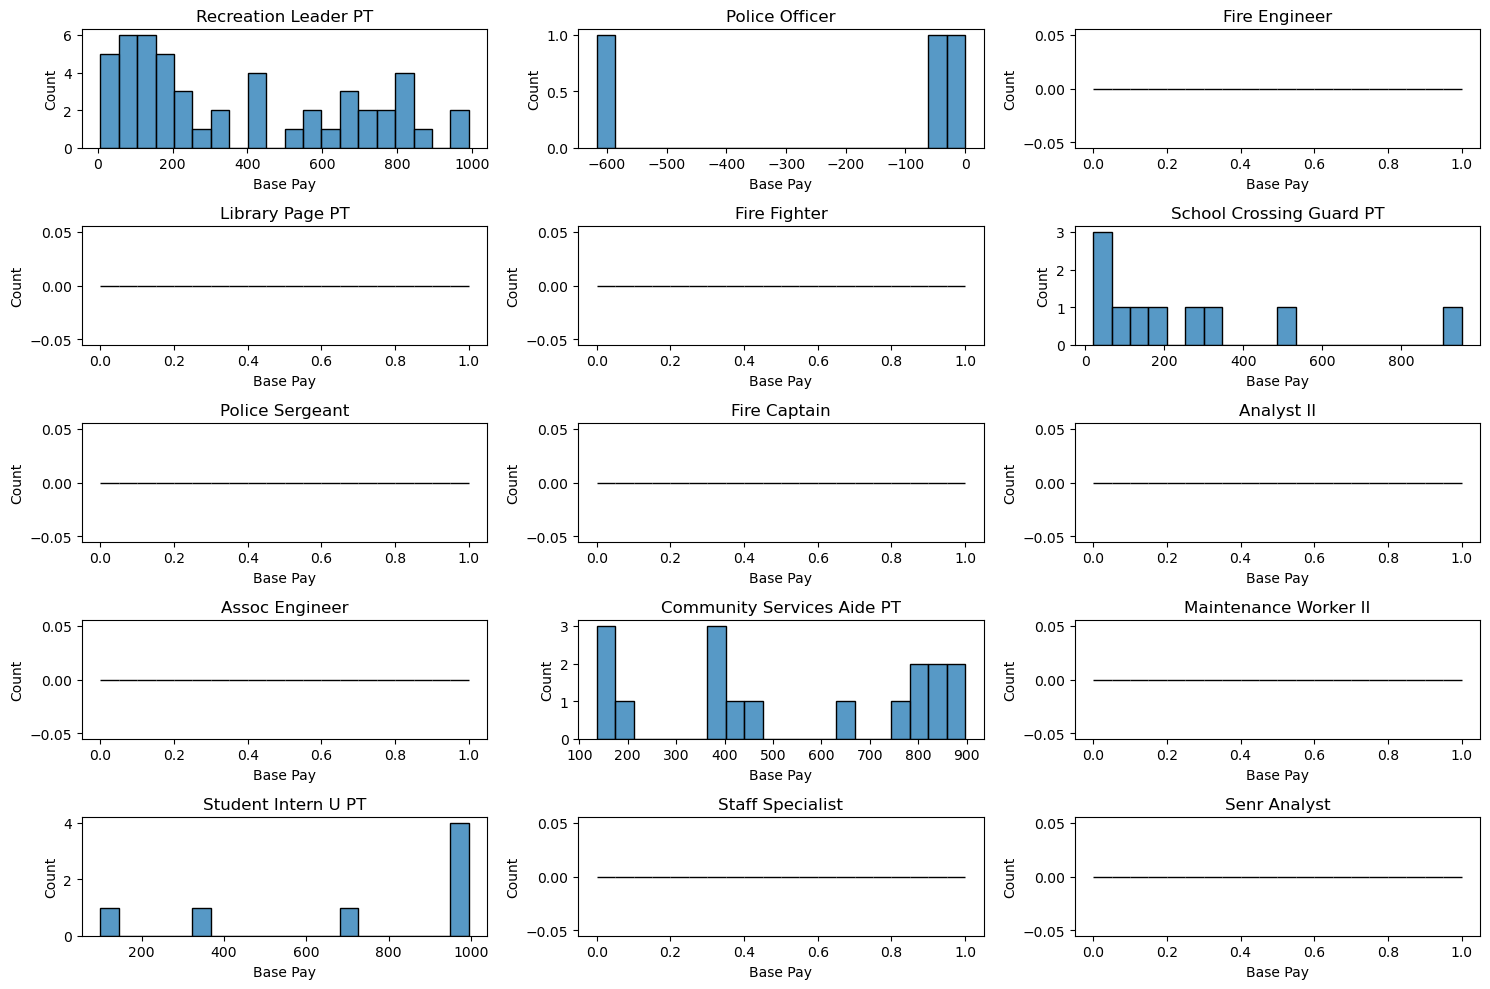

In [13]:

data2023['Job Title (as of 12/31/23)'] = data2023['Job Title (as of 12/31/23)'].astype("string")

data2023['Base Pay'] = pd.to_numeric(data2023['Base Pay'], errors='coerce')

# Get the 15 most common job titles
top_jobs = data2023['Job Title (as of 12/31/23)'].value_counts().head(15).index

# Filter the dataframe for only those job titles
data2023_top_jobs = data2023[data2023['Job Title (as of 12/31/23)'].isin(top_jobs)]

# Set up the figure size for the histograms
plt.figure(figsize=(15, 10))

# Loop through each job title and create a histogram
for i, job in enumerate(top_jobs, 1):
    plt.subplot(5, 3, i)  # 5 rows and 3 columns layout
    sns.histplot(data2023_top_jobs[data2023_top_jobs['Job Title (as of 12/31/23)'] == job]['Base Pay'], kde=False, bins=20)
    plt.title(job)
    plt.xlabel('Base Pay')
    plt.ylabel('Count')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

In [14]:
# Check if it worked by printing the data type
print(data2023['Job Title (as of 12/31/23)'].dtype)

print(data2023['Base Pay'].dtype)


string
float64
